### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### 2. Load the Dataset

In [2]:
df = pd.read_csv("car details v4.csv")
df.head()


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


### 3. Dataset Overview

In [3]:
df.shape


(2059, 20)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
df.describe()


,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


### 4. Data Exploration (EDA)

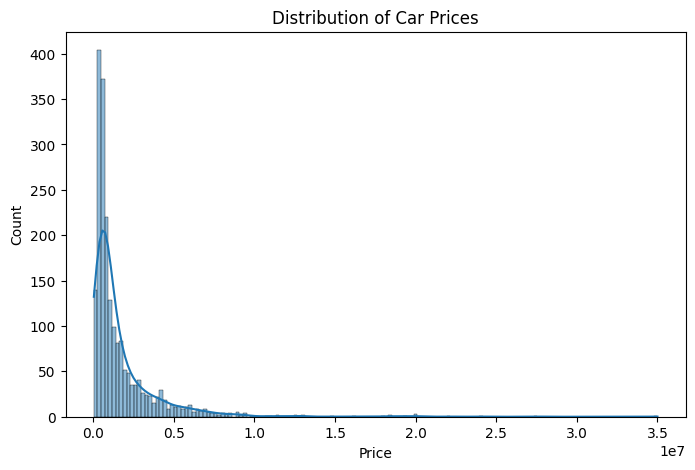

In [6]:
### 4.1 Target Variable Distribution (Price)
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of Car Prices")
plt.show()


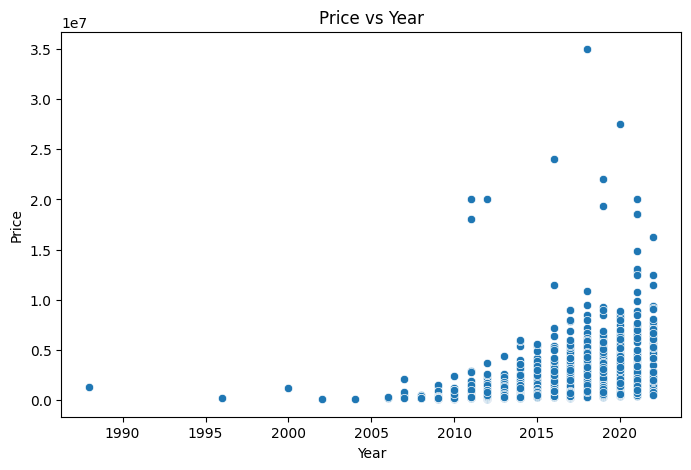

In [7]:
### 4.2 Price vs Year
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Year'], y=df['Price'])
plt.title("Price vs Year")
plt.show()


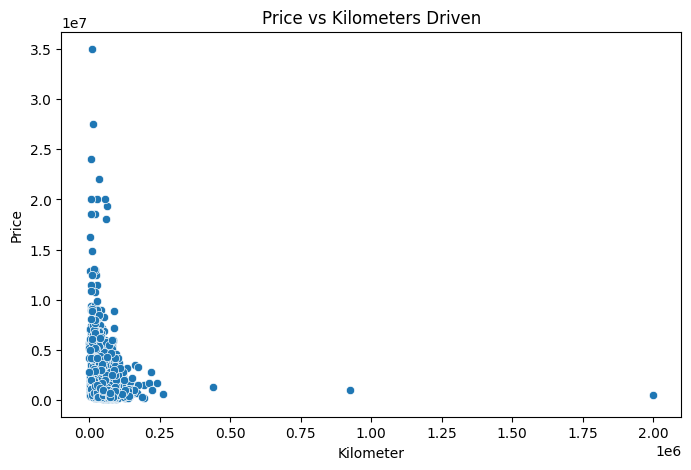

In [8]:
### 4.3 Price vs Kilometers Driven

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Kilometer'], y=df['Price'])
plt.title("Price vs Kilometers Driven")
plt.show()


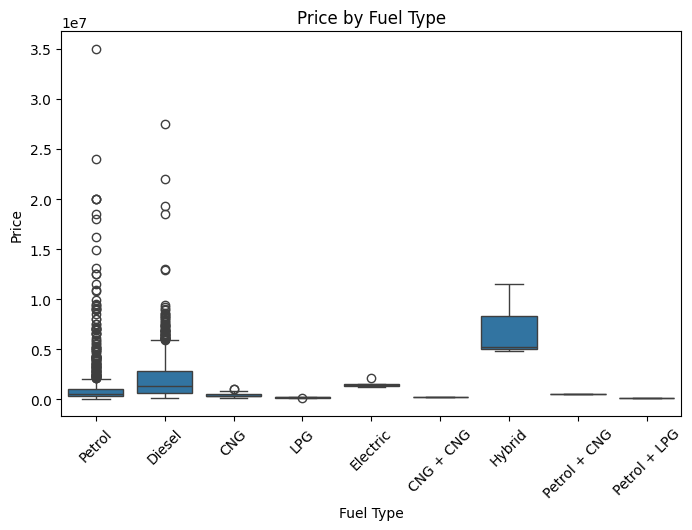

In [9]:
### 4.4 Price by Fuel Type

plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel Type', y='Price', data=df)
plt.title("Price by Fuel Type")
plt.xticks(rotation=45)
plt.show()


### 5. Data Preprocessing

In [10]:
### 5.1 Check Missing Values

df.isnull().sum().sort_values(ascending=False)


,0
Drivetrain,136
Fuel Tank Capacity,113
Max Torque,80
Engine,80
Max Power,80
Height,64
Width,64
Length,64
Seating Capacity,64
Price,0


In [11]:
### 5.2 Handle Missing Values

# Fill numerical columns with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum().sort_values(ascending=False)

,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


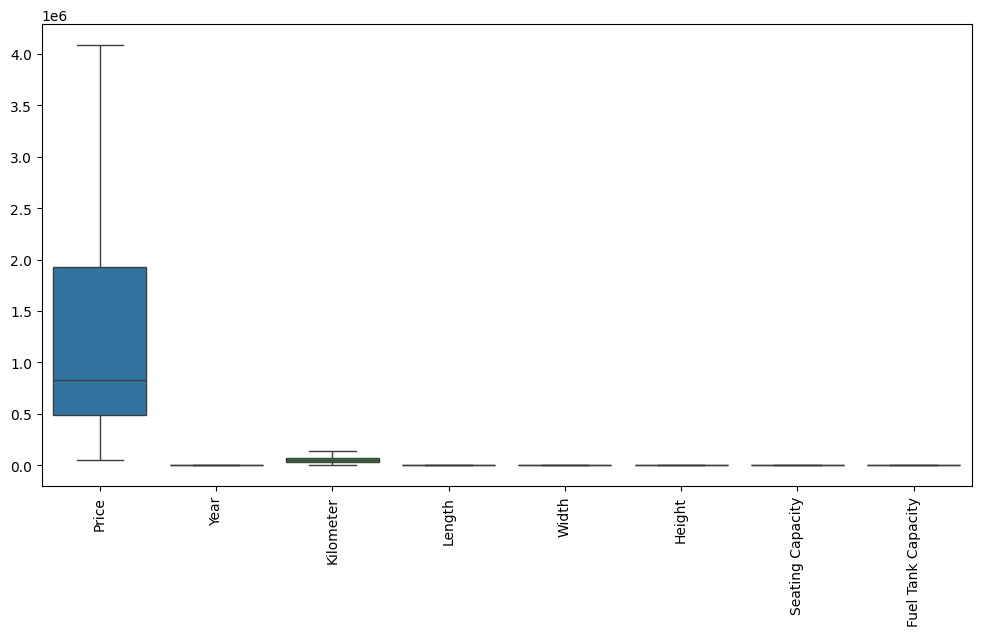

In [12]:
### Outlier detection


# Using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Boxplot after outlier treatment
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()


### 6. Encoding & Scaling

In [13]:
df['Seller Type'] = df['Seller Type'].astype('category').cat.codes


In [14]:
df['Transmission'] = df['Transmission'].map({
    'Manual': 0,
    'Automatic': 1
})

In [15]:
df['Owner'] = df['Owner'].map({
    'UnRegistered Car': 0,
    'First': 1,
    'Second': 2,
    'Third': 3,
    'Fourth': 4
})


In [16]:
make_freq = df['Make'].value_counts(normalize=True)
df['Make'] = df['Make'].map(make_freq)


In [17]:
one_hot_cols = ['Fuel Type', 'Drivetrain', 'Location', 'Color']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [18]:
df['Engine'] = df['Engine'].str.replace(' cc', '', regex=False)
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')


In [19]:
df['Max Power'] = df['Max Power'].str.extract(r'([\d\.]+)')
df['Max Power'] = pd.to_numeric(df['Max Power'], errors='coerce')


In [20]:
df['Max Torque'] = df['Max Torque'].str.extract(r'([\d\.]+)')
df['Max Torque'] = pd.to_numeric(df['Max Torque'], errors='coerce')


In [21]:
model_price_mean = df.groupby('Model')['Price'].mean()
df['Model'] = df['Model'].map(model_price_mean)


In [22]:
df[['Engine', 'Max Power', 'Max Torque','Owner']] = df[['Engine', 'Max Power', 'Max Torque','Owner']].fillna(
    df[['Engine', 'Max Power', 'Max Torque','Owner']].median()
)


In [23]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

### 7.Feature Selection

In [24]:
X = df.drop('Price', axis=1)
y = df['Price']

In [25]:
# Final NaN handling (mandatory)
X = X.fillna(X.median())


### 8. Train-Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
### Feature Scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 9. Model Development (Linear Regression)

In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

### 10. Model Evaluation

In [29]:
### 10.1 Predictions
y_pred = lr_model.predict(X_test)


In [30]:
### 10.2 Evaluation Metrics

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)


Mean Squared Error: 37653192898.5246
Root Mean Squared Error: 194044.30653467934
R-squared Score: 0.9757664757194869


### The model’s predictions deviate from the actual selling price by approximately ₹1.94 lakhs on average.

### An R-squared value of 0.976 indicates that approximately 97.6% of the variation in used car prices is explained.

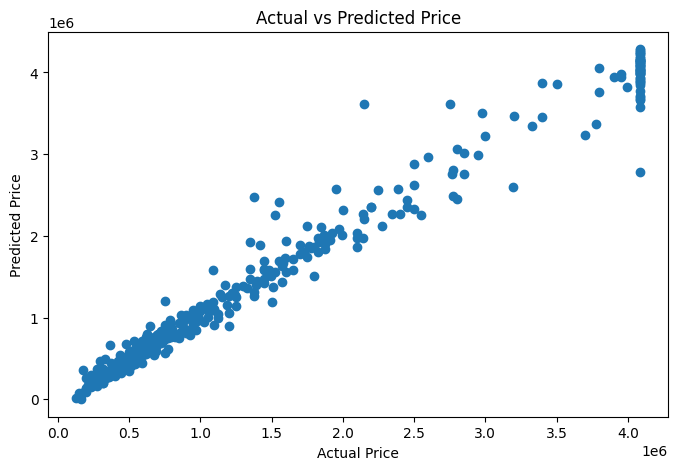

In [31]:
### 11. Actual vs Predicted Prices

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


In [32]:
### 12. Model Interpretation


Car price increases with newer manufacturing year

Higher kilometers driven reduces resale value

Fuel type, transmission, and seller type significantly influence price

Linear Regression explains price variation reasonably well (based on R² score)

Conclusion

This regression model successfully predicts used car prices using technical, usage, and seller details.
